In [1]:
#マウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
##作業するディレクトリを指定する.
%cd '/content/drive/MyDrive/Colab_Notebooks/paper'

/content/drive/MyDrive/Colab_Notebooks/paper


In [3]:
#test
test = True

In [4]:
#関係するツールの導入
from bs4 import BeautifulSoup
import urllib
import urllib.request as req
import time
import requests
import os
import numpy as np
import pandas as pd
import collections
import re
import csv

In [5]:
#input_folder_path: 入力となるファイルの保存場所
input_folder_path = '/content/drive/MyDrive/Colab_Notebooks/paper/paper_step4_test2'
#output_folder_path: 出力となるpdfファイルの保存場所
output_folder_path = '/content/drive/MyDrive/Colab_Notebooks/paper/paper_step5_test2'

In [6]:
f = open(input_folder_path + '/file_names_list.txt',"r")
file_names_list= []
for x in f:
  file_names_list.append(x.rstrip("\n"))
    #以下のようにしてしまうと、改行コードがlistに入ってしまうため注意
    #list_row.append(x)
f.close()

In [7]:
file_names_list = file_names_list[0:20]

In [8]:
if test:
  print(file_names_list[0])

C_5_Erman_Cineli.txt


In [9]:
#f = open(input_folder_path+ '/top_n_dictionary_20.txt',"r")#
#top_n_dictionary = []
#for x in f:
#  top_n_dictionary.append(x.rstrip("\n"))
    #以下のようにしてしまうと、改行コードがlistに入ってしまうため注意
    #list_row.append(x)
#f.close()

In [10]:
#if test:
#  print(len(top_n_dictionary))

In [11]:
path_a = input_folder_path + "/rate_data_20.csv"
df = pd.read_csv(path_a)
df = df.drop('Unnamed: 0', axis=1)

In [12]:
df = df[0:20]

In [13]:
display(df)

,homology,floer,iterated,supertrace,µcz,sign,lefschetz,orientations,hamiltonian,equivariant,action,isolated,symplectomorphism,str,aspherical,dold,symplectomorphisms,ﬁltered,shzh,capping,extremal,pseudo,rotations,φki,toric,φℓi,quantum,degenerate,rotation,loop,partition,conley,partitions,ϕki,µrs,witten,product,urel,defect,condition,...,oct,within,eit,strichartz,nls,kuk,app,tλu,imax,seit,θes,iei,odinger,tλψ,schr,together,tmax,older,kwkes,iuks,cerevisiae,xylose,ethanol,acid,glucose,yeast,fermentation,saccharomyces,production,microbiol,pathway,rhamnose,anaerobic,arabinose,galacturonic,strains,biotechnol,biomass,hydrolysates,nadh
0,69.882237,62.626967,57.204885,55.126427,49.760860,41.686934,36.750588,35.479324,35.193588,32.826280,32.293878,31.978461,30.571544,29.056486,28.563006,28.259414,26.601172,26.471350,25.986488,24.792518,-0.787356,-1.277897,-0.029764,-0.428191,-0.407290,-0.385257,0.013537,16.348439,1.502609,5.110872,-0.984498,5.531816,-0.759123,-0.295477,-0.295477,2.126168,3.577973,4.710115,-0.323680,-1.904200,...,-0.544842,-0.323093,-0.686647,-0.494434,-0.560639,-0.494434,0.386602,-0.448118,-0.438267,-0.417871,-0.417871,-0.407290,-0.385257,-0.373754,-0.385257,0.164093,-0.568372,-0.520249,-0.336897,-0.323680,-1.152091,-1.129119,-1.093757,-0.939098,-0.792882,-0.814610,-0.770540,-0.764853,-0.866553,-0.741668,-0.729800,-0.723793,-0.705465,-0.699248,-0.699248,-0.686647,-0.640595,-0.633744,-0.633744,-0.619813
1,9.109853,11.410729,3.607541,-0.556434,-0.502275,-0.096105,-0.370952,-0.478900,17.605139,-0.848727,4.779455,2.322028,-0.370952,-0.466773,1.433673,-0.321253,1.675647,-0.166646,-0.262302,14.088543,73.355443,50.442043,46.982309,42.304146,40.239216,38.062438,34.882372,34.788867,34.778711,33.442640,32.556206,31.608536,30.167511,29.192423,29.192423,28.160319,27.363958,26.983545,26.587124,25.772269,...,-0.624415,0.139850,-0.786930,-0.566645,-0.642518,-0.566645,-0.945787,-0.513564,-0.502275,-0.478900,-0.478900,-0.466773,-0.441523,-0.428340,-0.441523,-1.529669,-0.651381,-0.596230,-0.386100,-0.370952,-1.320350,-1.294023,-1.253497,-1.076251,-0.908680,-0.933582,-0.883075,-0.876558,-0.993111,-0.849987,-0.836385,-0.829501,-0.808496,-0.801372,-0.801372,-0.786930,-0.734153,-0.726300,-0.726300,-0.710334
2,6.139063,23.888742,4.772007,-0.455017,-0.410729,0.307584,-0.303342,-0.391615,17.141249,30.340543,15.600370,-0.546867,-0.303342,-0.381698,13.867525,-0.262701,2.238237,11.489663,-0.214494,10.280310,-0.737883,43.068415,40.052052,-0.401286,-0.381698,-0.361050,45.267115,14.648078,17.710616,2.329384,-0.922638,15.877014,-0.711425,-0.276911,-0.276911,10.395385,22.808509,29.506765,-0.303342,4.221469,...,-0.510608,-1.100809,-0.643503,-0.463367,-0.525412,-0.463367,-0.773406,-0.419961,-0.410729,-0.391615,-0.391615,-0.381698,-0.361050,-0.350270,-0.361050,-0.451209,-0.532659,-0.487560,-0.315728,-0.303342,-1.079701,-1.058172,-1.025032,-0.880091,-0.743062,-0.763425,-0.722124,-0.716794,-0.812105,-0.695067,-0.683944,-0.678314,-0.661138,-0.655312,-0.655312,-0.643503,-0.600344,-0.593923,-0.593923,-0.580867
3,7.295300,35.630347,5.626181,-0.488226,-0.440706,1.252001,-0.325481,-0.420196,23.566194,38.666522,10.828160,-0.586780,-0.325481,-0.409557,6.207211,-0.281874,4.473895,2.192672,-0.230149,7.820078,-0.791737,9.612545,11.717373,-0.430574,-0.409557,-0.387401,8.012784,29.023949,1.481675,0.020296,-0.989977,14.711505,-0.763348,-0.297122,-0.297122,-0.398633,9.663499,-0.571535,-0.325481,0.639934,...,-0.547874,-1.181151,-0.690469,-0.497186,-0.563759,-0.497186,-0.829853,-0.450611,-0.440706,-0.420196,-0.420196,-0.409557,-0.387401,-0.375834,-0.387401,-0.596896,-0.571535,-0.523144,-0.338772,-0.325481,-1.158502,-1.135403,-1.099844,-0.944325,-0.797294,-0.819144,-0.774829,-0.769110,-0.871376,-0.745796,-0.733861,-0.727821,-0.709391,-0.703140,-0.703140,-0.690469,-0.644160,-0.637270,-0.637270,-0.623262
4,16.625644,45.538265,1.083639,-0.608445,-0.549224,-1.147347,-0.405626,-0.523664,39.381080,-1.652020,8.326502,11.576793,4.525102,-0.510404,-0.561568,-0.351282,7.326722,3.860843,-0

##K-means法

In [14]:
from matplotlib import pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans
import numpy as np 

In [15]:
#クラスタリングの結果からfile名をクラスタごとに分ける
# show_result (str_list,int_array,int) -> str_list_list
def show_result (file, result_k,n):
  result_file = []
  for i in range(n):
    result_file.append([])
  for j in range(len(file)):
    l = result_k[j]
    result_file[l].append(file[j])
  #return print(result_file)
  return result_file

In [16]:
#傾向となる単語を取りだす
#df: データ k_means_result:k-means法でクラスタリングした結果, n:クラスタリングの個数
def trend (df,k_means_result,n,m,dictionary):
  trend = []
  df['cluster_id']=k_means_result
  for i in range(n):
    trend_n = df[df['cluster_id']==i].mean()
    trend_number = trend_n.drop('cluster_id', axis=0)
    trend_word = trend_number.sort_values(ascending = False)[0:m].index
    trend.append((i,trend_word))
  #return print(trend)
  return trend

In [17]:
#k-means
result = KMeans(n_clusters=5).fit_predict(df)

In [18]:
if False:
  df['cluster_id']=result
  i =1
  trend_n = df[df['cluster_id']==i].mean()
  trend_n[1963]
  #trend_number = trend_n.drop('cluster_id', axis=0)
  #trend_number = trend_number.drop('Unnamed: 0', axis=0)
  trend_number.index
  trend_number
  trend_n_sub = trend_number.sort_values( ascending=False)
  trend_n_sub
  trend_number_list = list(trend_n_sub.index[0:5])
  trend_number_list
  df.head()
  result

##10単語ずつ取り出して辞書を作ったもの

In [19]:
show_result(file_names_list,result,5)

[['C_5_Erman_Cineli.txt',
  'C_4_Erman_Cineli.txt',
  'C_3_Erman_Cineli.txt',
  'C_2_Erman_Cineli.txt',
  'C_1_Erman_Cineli.txt'],
 ['2110.15943.txt'],
 ['B_5_Joan_Gimeno.txt',
  'B_4_Joan_Gimeno.txt',
  'B_3_Joan_Gimeno.txt',
  'B_2_Joan_Gimeno.txt',
  'B_1_Joan_Gimeno.txt',
  '2110.15949.txt',
  '2110.15926.txt',
  '2110.15914.txt',
  '2110.15907.txt'],
 ['A_5_Tobias_Barthel.txt', 'A_1_Tobias_Barthel.txt'],
 ['A_4_Tobias_Barthel.txt',
  'A_3_Tobias_Barthel.txt',
  'A_2_Tobias_Barthel.txt']]

In [20]:
if test:
  df.columns

In [21]:
#それぞれのクラスターでよく用いられる単語10個
trend(df,result,5,10,df.columns)

[(0,
  Index(['floer', 'hamiltonian', 'homology', 'pseudo', 'degenerate', 'rotations',
         'equivariant', 'quantum', 'entropy', 'orbits'],
        dtype='object')),
 (1,
  Index(['meta', 'metaicl', 'shot', 'tweet_eval', 'glue', 'tasks', 'uniﬁedqa',
         'ethos', 'emnlp', 'superglue'],
        dtype='object')),
 (2,
  Index(['spin', 'orbit', 'periodic', 'kam', 'gatelrd', 'φpθ', 'llave', 'latent',
         'resonance', 'celletti'],
        dtype='object')),
 (3,
  Index(['morava', 'spectral', 'spdual', 'adams', 'cit', 'modω', 'comodules',
         'modules', 'spk', 'milnor'],
        dtype='object')),
 (4,
  Index(['spc', 'supph', 'balmer', 'supp', 'support', 'category', 'noetherian',
         'loc', 'tensor', 'stmod'],
        dtype='object'))]

##100単語ずつ取り出して辞書を作ったもの

In [22]:
path_a = input_folder_path + "/rate_data_100.csv"
df = pd.read_csv(path_a)
df = df.drop('Unnamed: 0', axis=1)
df = df[0:20]

In [23]:
#k-means
result = KMeans(n_clusters=4).fit_predict(df)

In [24]:
show_result(file_names_list,result,4)

[['C_5_Erman_Cineli.txt',
  'C_4_Erman_Cineli.txt',
  'C_3_Erman_Cineli.txt',
  'C_2_Erman_Cineli.txt',
  'C_1_Erman_Cineli.txt',
  'B_5_Joan_Gimeno.txt',
  'B_4_Joan_Gimeno.txt',
  'B_3_Joan_Gimeno.txt',
  'B_2_Joan_Gimeno.txt',
  'B_1_Joan_Gimeno.txt',
  '2110.15926.txt',
  '2110.15914.txt',
  '2110.15907.txt'],
 ['2110.15943.txt'],
 ['A_5_Tobias_Barthel.txt',
  'A_4_Tobias_Barthel.txt',
  'A_3_Tobias_Barthel.txt',
  'A_2_Tobias_Barthel.txt',
  'A_1_Tobias_Barthel.txt'],
 ['2110.15949.txt']]

In [25]:
#それぞれのクラスターでよく用いられる単語10個
trend(df,result,4,10,df.columns)

[(0, Index(['periodic', 'spin', 'orbit', 'floer', 'hamiltonian', 'orbits',
         'symplectic', 'homology', 'action', 'pseudo'],
        dtype='object')),
 (1,
  Index(['meta', 'metaicl', 'shot', 'tweet_eval', 'glue', 'tasks', 'uniﬁedqa',
         'ethos', 'emnlp', 'superglue'],
        dtype='object')),
 (2, Index(['spc', 'category', 'balmer', 'tensor', 'supp', 'spectrum', 'supph',
         'support', 'noetherian', 'spectra'],
        dtype='object')),
 (3,
  Index(['gatelrd', 'latent', 'rnns', 'gate', 'robot', 'sheep', 'lstms', 'suppl',
         'gates', 'billiard'],
        dtype='object'))]

In [26]:
display(df)

,homology,floer,iterated,supertrace,µcz,sign,lefschetz,orientations,hamiltonian,equivariant,action,isolated,symplectomorphism,str,aspherical,dold,symplectomorphisms,ﬁltered,shzh,capping,smith,euler,determinant,dim,fhs,saze,transversality,trivialization,symplectically,signs,det,inel,germ,symplectic,hhm,gromoll,tically,dxk,unﬁltered,dϕh,...,dien,atp,hemicellulose,pentose,cellulose,lactaldehyde,hahn,scheffers,bacterial,galp,gal,engineered,environ,stipitis,acids,uptake,hexose,fuel,linked,wild,lignocellulosic,aerobic,heterologous,fungal,fems,cultures,mol,compounds,transporter,cofactor,kuyper,ferment,oxygen,pichia,boles,klinke,mannose,penttila,feedstocks,cluster_id
0,69.882237,62.626967,57.204885,55.126427,49.760860,41.686934,36.750588,35.479324,35.193588,32.826280,32.293878,31.978461,30.571544,29.056486,28.563006,28.259414,26.601172,26.471350,25.986488,24.792518,24.255106,24.099756,23.316351,21.696572,21.217850,21.217850,21.217850,20.441336,20.097739,19.672805,19.539671,19.346934,18.936048,18.794477,18.375185,18.375185,18.375185,18.375185,18.375185,18.375185,...,-0.373754,-0.373754,-0.373754,-0.373754,-0.373754,-0.373754,-0.560639,-0.361886,-0.361886,-0.361886,-0.605561,-0.373754,-0.520249,-0.349615,-0.349615,-0.349615,-0.349615,-0.349615,-0.476448,-0.407290,-0.336897,-0.336897,-0.336897,-0.336897,-0.336897,-0.336897,-0.396427,-0.396427,-0.349615,-0.323680,-0.323680,-0.323680,-0.323680,-0.323680,-0.309900,-0.309900,-0.309900,-0.309900,-0.309900,0
1,9.109853,11.410729,3.607541,-0.556434,-0.502275,-0.096105,-0.370952,-0.478900,17.605139,-0.848727,4.779455,2.322028,-0.370952,-0.466773,1.433673,-0.321253,1.675647,-0.166646,-0.262302,14.088543,0.178070,-0.513564,-0.624415,12.169561,-0.214168,-0.214168,-0.214168,2.203950,3.479723,2.095161,-1.010286,21.465850,-0.239448,18.635505,-0.185475,-0.185475,-0.185475,-0.185475,-0.185475,-0.185475,...,-0.428340,-0.428340,-0.428340,-0.428340,-0.428340,-0.428340,-0.642518,-0.414738,-0.414738,-0.414738,-0.694002,-0.428340,-0.596230,-0.400675,-0.400675,-0.400675,-0.400675,-0.400675,-0.546032,-0.466773,-0.386100,-0.386100,-0.386100,-0.386100,-0.386100,-0.386100,-0.454324,-0.454324,-0.400675,-0.370952,-0.370952,-0.370952,-0.370952,-0.370952,-0.355159,-0.355159,-0.355159,-0.355159,-0.355159,0
2,6.139063,23.888742,4.772007,-0.455017,-0.410729,0.307584,-0.303342,-0.391615,17.141249,30.340543,15.600370,-0.546867,-0.303342,-0.381698,13.867525,-0.262701,2.238237,11.489663,-0.214494,10.280310,4.598440,-0.419961,-0.510608,-1.145210,-0.175134,-0.175134,-0.175134,2.851606,6.893562,-0.327647,-0.826149,18.785519,-0.195805,21.024555,-0.151670,-0.151670,-0.151670,-0.151670,-0.151670,-0.151670,...,-0.350270,-0.350270,-0.350270,-0.350270,-0.350270,-0.350270,-0.525412,-0.339147,-0.339147,-0.339147,-0.567512,-0.350270,-0.487560,-0.327647,-0.327647,-0.327647,-0.327647,-0.327647,-0.446511,-0.381698,-0.315728,-0.315728,-0.315728,-0.315728,-0.315728,-0.315728,-0.371518,-0.371518,-0.327647,-0.303342,-0.303342,-0.303342,-0.303342,-0.303342,-0.290427,-0.290427,-0.290427,-0.290427,-0.290427,0
3,7.295300,35.630347,5.626181,-0.488226,-0.440706,1.252001,-0.325481,-0.420196,23.566194,38.666522,10.828160,-0.586780,-0.325481,-0.409557,6.207211,-0.281874,4.473895,2.192672,-0.230149,7.820078,0.442929,-0.450611,-0.547874,-1.228793,-0.187916,-0.187916,-0.187916,-0.338772,6.366744,-0.351560,-0.886446,-0.555873,4.549660,12.742447,-0.162740,-0.162740,-0.162740,-0.162740,-0.162740,-0.162740,...,-0.375834,-0.375834,-0.375834,-0.375834,-0.375834,-0.375834,-0.563759,-0.363900,-0.363900,-0.363900,-0.608931,-0.375834,-0.523144,-0.351560,-0.351560,-0.351560,-0.351560,-0.351560,-0.479100,-0.409557,-0.338772,-0.338772,-0.338772,-0.338772,-0.338772,-0.338772,-0.398633,-0.398633,-0.351560,-0.325481,-0.325481,-0.325481,-0.325481,-0.325481,-0.311624,-0.311624,-0.311624,-0.311624,-0.311624,0
4,16.625644,45.538265,1.083639,-0.608445,-0.549224,-1.147347,-0.405626,-0.523664,39.381080,-1.652020,8.326502,11.576793,4.525102,-0.510404,-0.561568,-0.351282,7.326722

階層型クラスタリング(デンドログラム)

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [28]:
def plot_dendrogram(model, **kwargs):
   # Create linkage matrix and then plot the dendrogram

   # create the counts of samples under each node
    #要素の値が全てゼロの配列を作成する
   counts = np.zeros(model.children_.shape[0])
   n_samples = len(model.labels_)
   for i, merge in enumerate(model.children_):
      current_count = 0
      for child_idx in merge:
         if child_idx < n_samples:
            current_count += 1 # leaf node
         else:
            current_count += counts[child_idx - n_samples]
      counts[i] = current_count

   linkage_matrix = np.column_stack([model.children_, model.distances_,
counts]).astype(float)

   # Plot the corresponding dendrogram
   #dendrogram(linkage_matrix, **kwargs,labels = file_names_list,leaf_rotation=90 )#, orientation='left')
   dendrogram(linkage_matrix, **kwargs,labels = file_names_list, orientation='left')

Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

linkage {‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’

In [29]:
def plot_model_dendlogram (parm_affinity, param_linkage):
  # setting distance_threshold=0 ensures we compute the full tree.
  # affinity: 距離の出す際の計算方法 
  #linkage : 観測セット間で使用する距離 ward マージされるクラスターの分散を最小限に抑える 
  #distance_threshold クラスターはマージされないリンケージ距離のしきい値
  #n_clusters 検索するクラスターの数
  model = AgglomerativeClustering(affinity= parm_affinity,
  linkage= param_linkage, 
  distance_threshold=0,
  n_clusters=None)
  model = model.fit(df)
  fig = plt.figure( figsize=(6,8))
  plt.title(parm_affinity + ', linkage=' + param_linkage )
  # plot the top three levels of the dendrogram
  plot_dendrogram(model, truncate_mode='level')#, p=3)
  plt.xlabel("Number of points in node (or index of point if no parenthesis).")
  #fig.savefig("dendrogram.pdf")
  plt.show()

##ward法
ユークリッド距離のみ

ユークリッド距離

In [30]:
# setting distance_threshold=0 ensures we compute the full tree.
# affinity: 距離の出す際の計算方法 
#linkage : 観測セット間で使用する距離 ward マージされるクラスターの分散を最小限に抑える 
#distance_threshold クラスターはマージされないリンケージ距離のしきい値
#n_clusters 検索するクラスターの数
model = AgglomerativeClustering(affinity='euclidean',
linkage='ward', 
distance_threshold=0,
n_clusters=None)

model = model.fit(df)

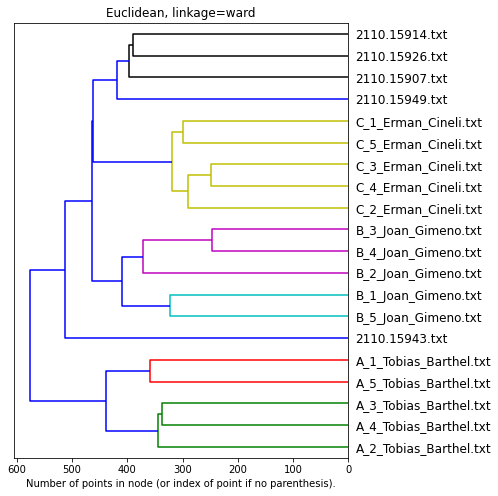

In [31]:
fig = plt.figure( figsize=(6,8))
plt.title('Euclidean, linkage=ward')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level')#, p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#fig.savefig("dendrogram.pdf")
plt.show()

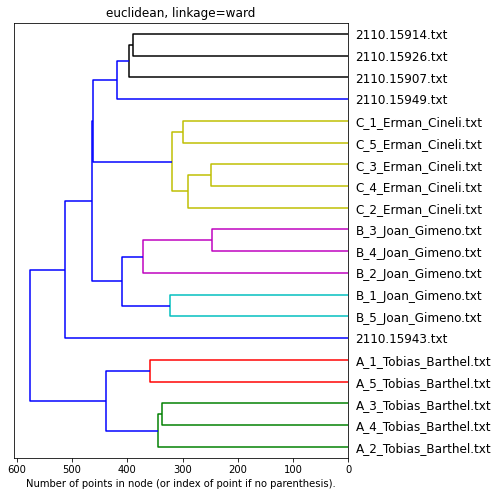

In [32]:
plot_model_dendlogram ('euclidean', 'ward')

##complete

L1距離

In [33]:
model = AgglomerativeClustering(affinity='l1',
                                linkage ='complete',
                                distance_threshold=0,
                                n_clusters=None)

model = model.fit(df)

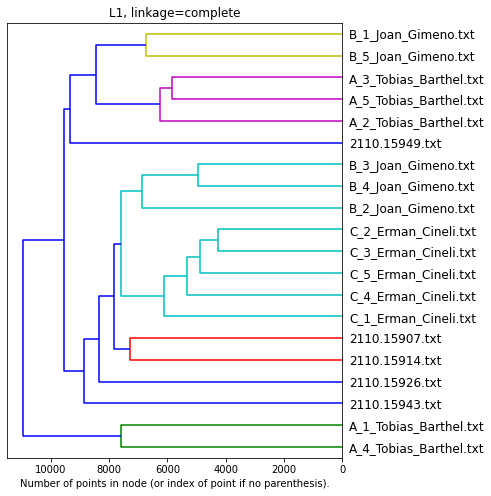

In [34]:
fig = plt.figure( figsize=(6,8))
plt.title('L1, linkage=complete')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level')#, p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#fig.savefig("dendrogram.pdf")
plt.show()

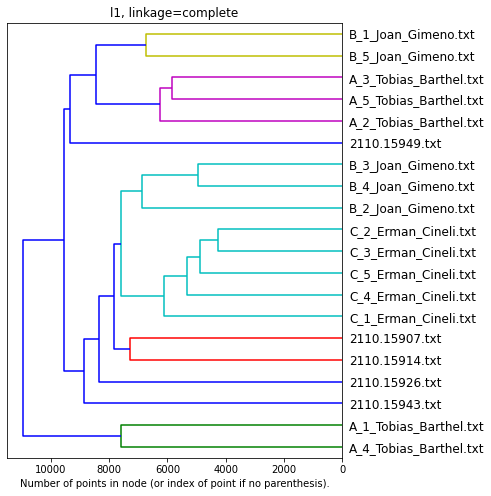

In [35]:
plot_model_dendlogram ('l1', 'complete')

L2距離

In [36]:
if False:
  model = AgglomerativeClustering(affinity='l2',
                                  linkage ='complete',
                                  distance_threshold=0,
                                  n_clusters=None)

  model = model.fit(df)

  fig = plt.figure( figsize=(6,8))
  plt.title('L2, linkage=complete')
  # plot the top three levels of the dendrogram
  plot_dendrogram(model, truncate_mode='level')#, p=3)
  plt.xlabel("Number of points in node (or index of point if no parenthesis).")
  #fig.savefig("dendrogram.pdf")
  plt.show()

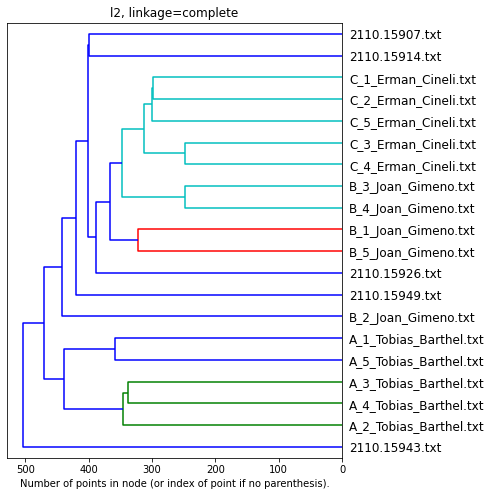

In [37]:
plot_model_dendlogram ('l2', 'complete')

マンハッタン距離

In [38]:
if False:
  model = AgglomerativeClustering(affinity='manhattan',
                                  linkage ='complete',
                                  distance_threshold=0,
                                  n_clusters=None)

  model = model.fit(df)

  fig = plt.figure( figsize=(6,8))
  plt.title('Manhattan, linkage=complete')
  # plot the top three levels of the dendrogram
  plot_dendrogram(model, truncate_mode='level')#, p=3)
  plt.xlabel("Number of points in node (or index of point if no parenthesis).")
  #fig.savefig("dendrogram.pdf")
  plt.show()

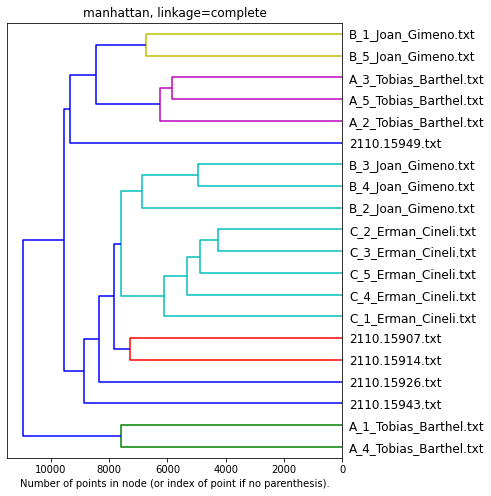

In [39]:
plot_model_dendlogram ('manhattan', 'complete')

“cosine”

In [40]:
if False:
  model = AgglomerativeClustering(affinity='cosine',
                                  linkage ='complete',
                                  distance_threshold=0,
                                  n_clusters=None)

  model = model.fit(df)

  fig = plt.figure( figsize=(6,8))
  plt.title('manhattan, linkage=ward')
  # plot the top three levels of the dendrogram
  plot_dendrogram(model, truncate_mode='level')#, p=3)
  plt.xlabel("Number of points in node (or index of point if no parenthesis).")
  #fig.savefig("dendrogram.pdf")
  plt.show()

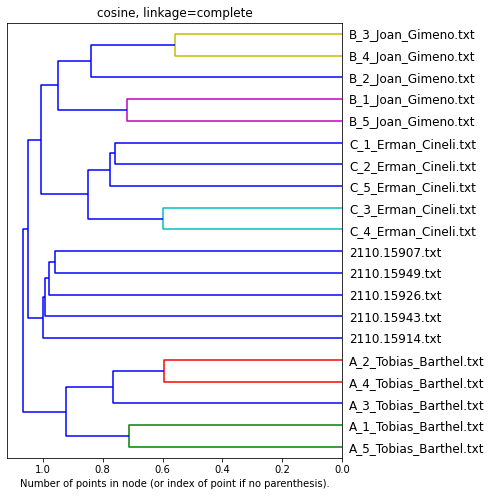

In [41]:
plot_model_dendlogram ('cosine', 'complete')

ユークリッド

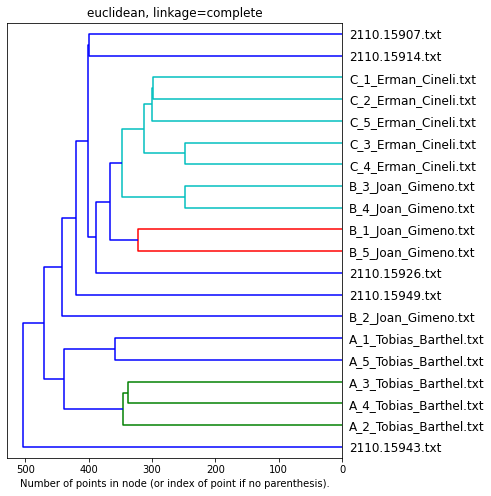

In [42]:
plot_model_dendlogram ('euclidean', 'complete')

##average

L1

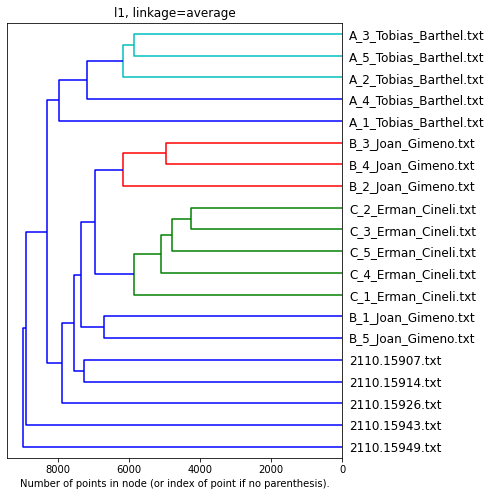

In [43]:
plot_model_dendlogram ('l1', 'average')

L2

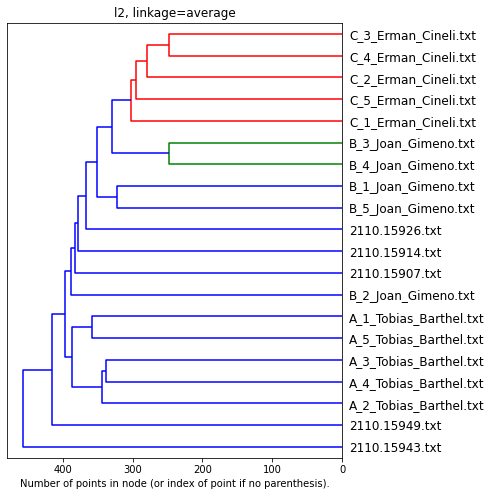

In [44]:
plot_model_dendlogram ('l2', 'average')

manhattan

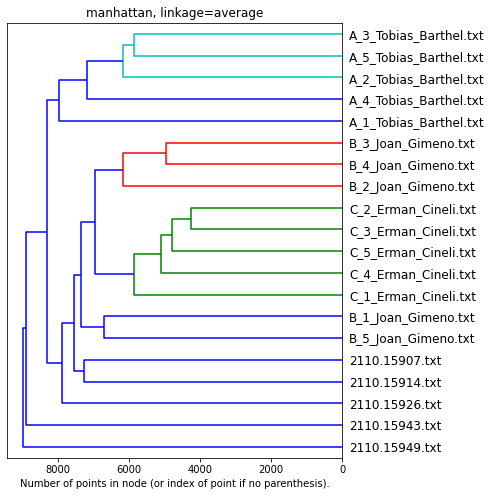

In [45]:
plot_model_dendlogram ('manhattan', 'average')

cosine

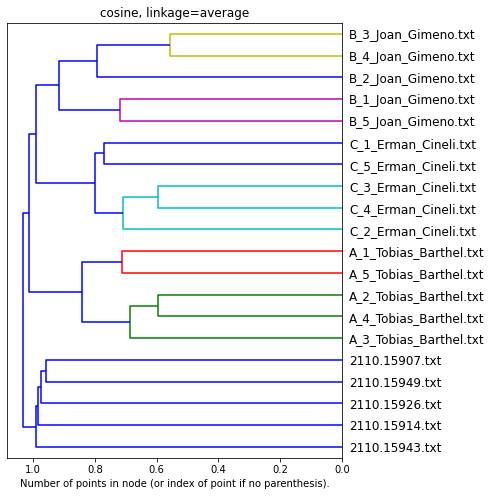

In [46]:
plot_model_dendlogram ('cosine', 'average')

ユークリッド距離

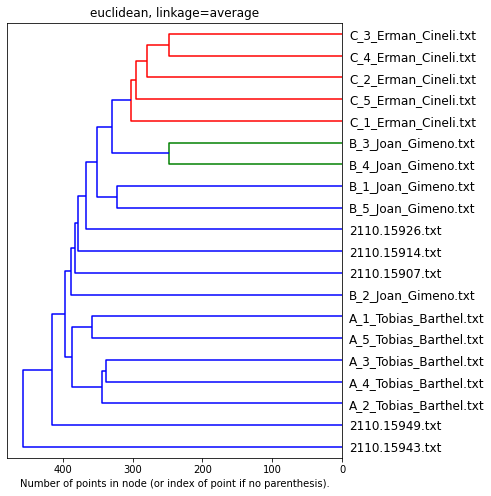

In [47]:
plot_model_dendlogram ('euclidean', 'average')

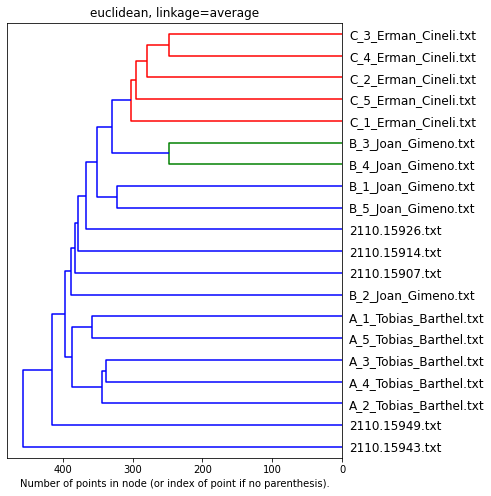

In [48]:
parm_affinity = 'euclidean'
param_linkage = 'average'
  # setting distance_threshold=0 ensures we compute the full tree.
  # affinity: 距離の出す際の計算方法 
  #linkage : 観測セット間で使用する距離 ward マージされるクラスターの分散を最小限に抑える 
  #distance_threshold クラスターはマージされないリンケージ距離のしきい値
  #n_clusters 検索するクラスターの数
model = AgglomerativeClustering(affinity= parm_affinity,
linkage= param_linkage, 
distance_threshold=0,
n_clusters=None)
model = model.fit(df)
fig = plt.figure( figsize=(6,8))
plt.title(parm_affinity + ', linkage=' + param_linkage )
  # plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level')#, p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.figure(figsize=(6, 8), dpi=300)
  #fig.savefig("dendrogram.pdf")
plt.savefig("dendrogram_z_euclidean_mean.pdf", bbox_inches='tight')
plt.show()

#single

L1

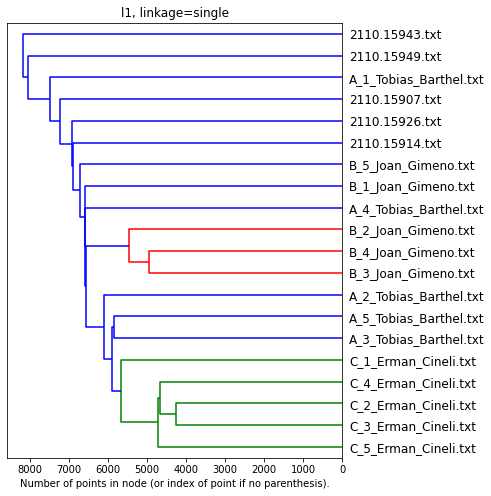

In [49]:
plot_model_dendlogram ('l1', 'single')

L2

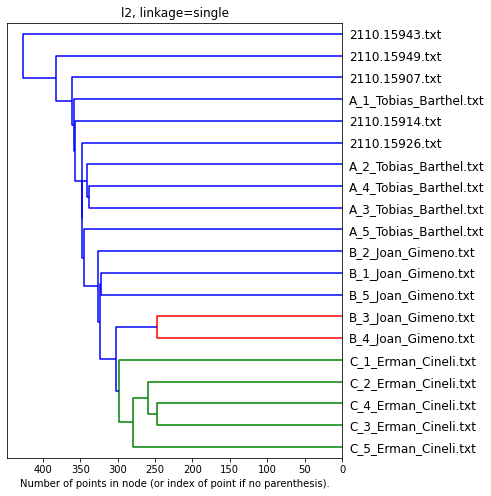

In [50]:
plot_model_dendlogram ('l2', 'single')

manhattan

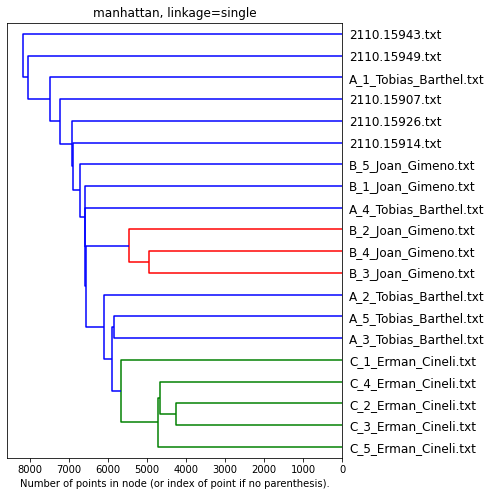

In [51]:
plot_model_dendlogram ('manhattan', 'single')

cosine

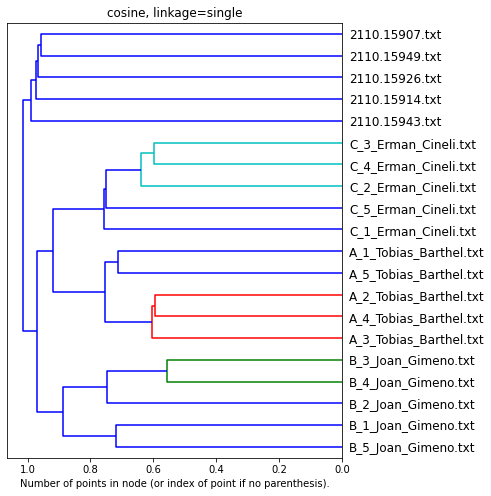

In [52]:
plot_model_dendlogram ('cosine', 'single')

ユークリッド距離距離

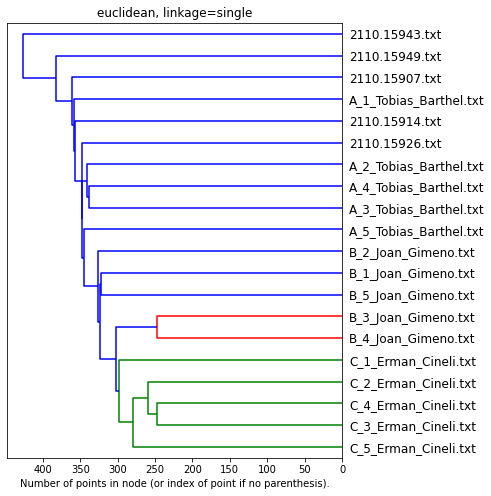

In [53]:
plot_model_dendlogram ('euclidean', 'single')